In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
print("\nChecking for Missing Values:")
print(df.isnull().sum())


Checking for Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


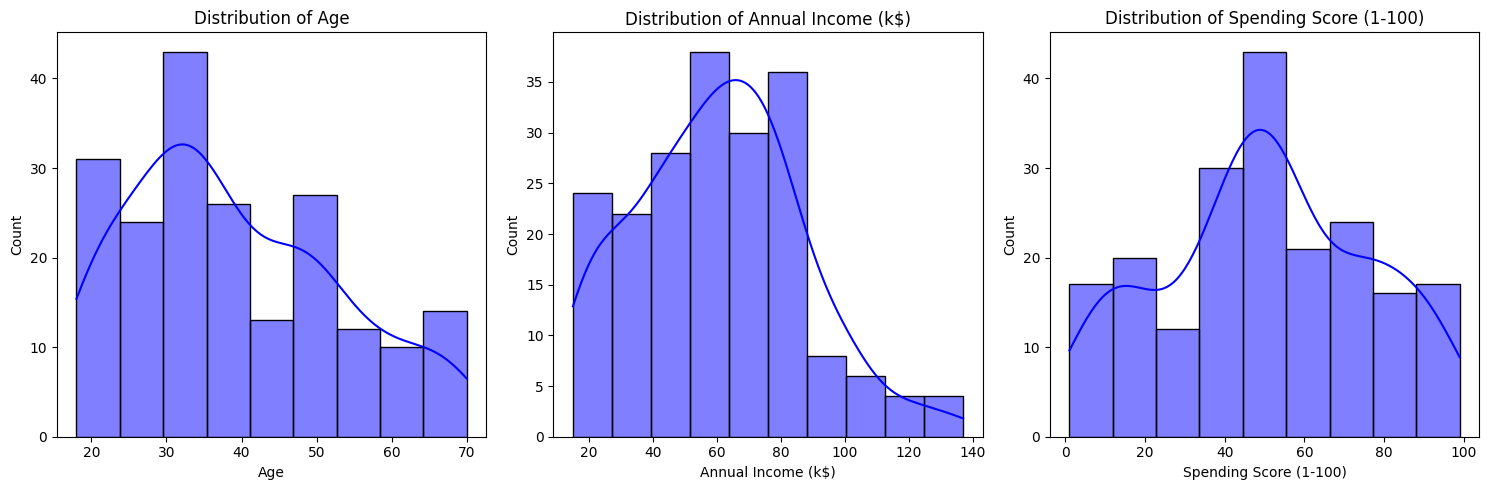

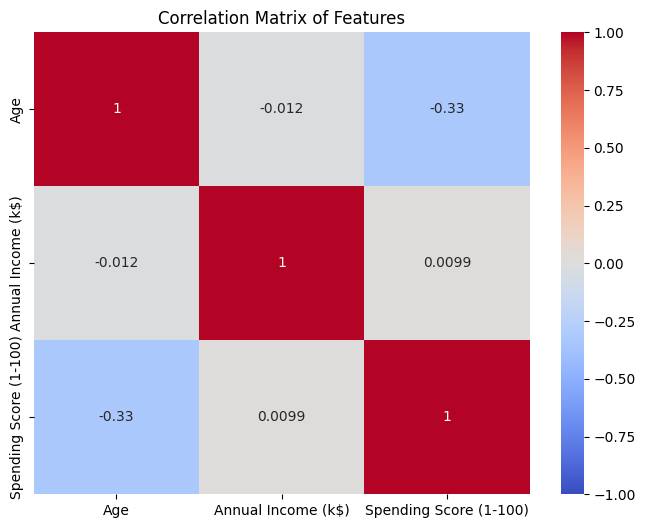


Average Spending Score by Gender:
Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms to check the distribution of features
plt.figure(figsize=(15, 5))  # Set the figure size
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i + 1)  # Create subplots (1 row, 3 columns)
    sns.histplot(df[col], kde=True, color='blue')  # Plot histogram with KDE
    plt.title(f'Distribution of {col}')  # Set subplot title
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('distribution_features.png')  # Save the figure
plt.show()  # Display the figure

# Plot heatmap to check correlation between features
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)  # Plot heatmap
plt.title('Correlation Matrix of Features')  # Set title
plt.savefig('correlation_heatmap.png')  # Save the figure
plt.show()  # Display the figure

# Analyze by gender (compare average spending score)
print("\nAverage Spending Score by Gender:")
print(df.groupby('Gender')['Spending Score (1-100)'].mean())

In [8]:
# Select important features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize data to ensure features have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

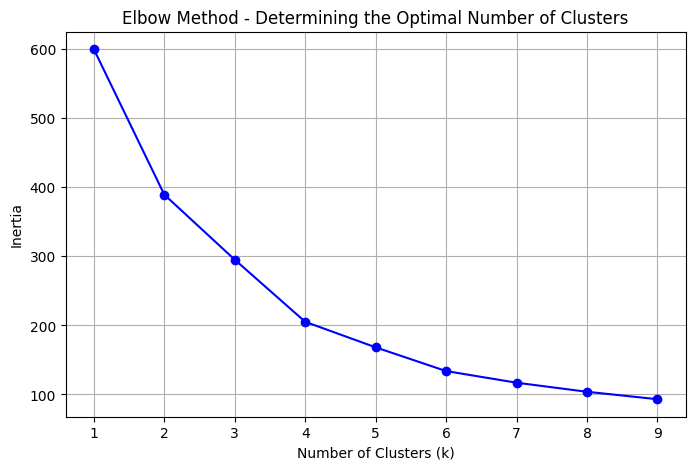

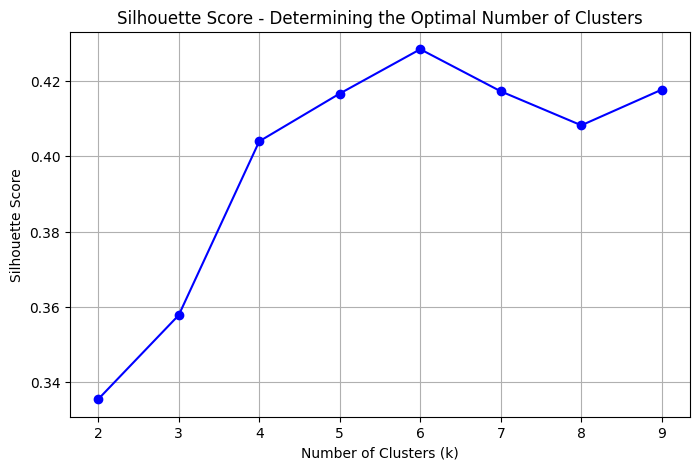

In [9]:
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Determining the Optimal Number of Clusters')
plt.grid(True)
plt.savefig('elbow_plot.png')
plt.show()

# Further evaluation using Silhouette Score
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), sil_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - Determining the Optimal Number of Clusters')
plt.grid(True)
plt.savefig('silhouette_plot.png')
plt.show()

In [10]:
# Reduce data dimensionality to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("\nExplained Variance Ratio by 2 Principal Components:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio by 2 Principal Components: [0.44266167 0.33308378]
Total Explained Variance: 0.7757454566976747


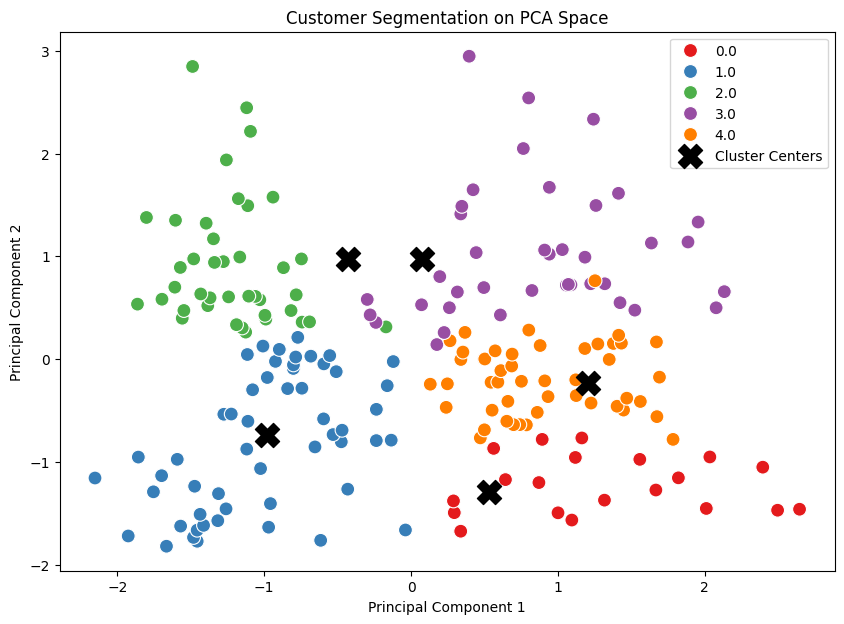

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Assign cluster labels to the data
df['Cluster'] = kmeans.labels_

# Add cluster labels to the dimensionality-reduced data
X_pca = np.column_stack((X_pca, kmeans.labels_))

# Visualize the clusters in 2D space
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_pca[:, 2], palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation on PCA Space')
plt.legend()
plt.savefig('cluster_plot.png')
plt.show()

In [13]:
# Calculate the average values of features for each cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print("\nAverage characteristics of clusters:")
print(cluster_summary)


Average characteristics of clusters:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        46.25               26.75                   18.35
1        25.19               41.09                   62.24
2        32.88               86.10                   81.53
3        39.87               86.10                   19.36
4        55.64               54.38                   48.85
